# Hypothesis testing

### **1. Hypothesis: Completion Rate**

**Objective:** Determine if the difference in completion rates between the Test and Control groups is statistically significant.

**Hypotheses:**

•	**Null Hypothesis (H0):** There is no significant difference in completion rates between the Test and Control groups.

•	**Alternative Hypothesis (H1):** The completion rate is significantly higher in the Test group compared to the Control group.

In [14]:
# import libraries

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# import data

test_data = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_test_random.csv')

control_data = pd.read_csv('/Users/alexandreribeiro/Desktop/Ironhacks Booty/5th week/Project/Datasets/df_control_random.csv')


### Explanation:

Purpose:

- The Chi-Square test was used to determine whether there is a significant difference in the completion rates between the Control and Test groups. Specifically, we aimed to test the hypothesis that the new user interface (Test group) results in a higher completion rate compared to the traditional interface (Control group).

In [29]:
# Ensure unique visits or clients

unique_control_visits = control_data['visit_id'].nunique()
unique_test_visits = test_data['visit_id'].nunique()

# Filter data to include only the 'confirm' step

confirm_control = control_data[control_data['process_step'] == 'confirm']
confirm_test = test_data[test_data['process_step'] == 'confirm']

In [30]:
# Calculate the completion rate for both Test and Control groups

completion_rate_control = confirm_control.shape[0] / unique_control_visits
completion_rate_test = confirm_test.shape[0] / unique_test_visits

# Print the completion rate in percentage rounded to 1 decimal place

print('Completion rate by variation:')
print('Control:', round(completion_rate_control * 100, 1), '%')
print('Test:', round(completion_rate_test * 100, 1), '%')

Completion rate by variation:
Control: 45.6 %
Test: 48.0 %


In [31]:
# Ensure there are no duplicate labels in the index
control_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)


In [32]:
from scipy.stats import chi2_contingency

# Ensure the 'variation' and 'process_step' columns are present
control_data['variation'] = 'Control'
test_data['variation'] = 'Test'

# Create a combined DataFrame
combined_data = pd.concat([control_data, test_data], ignore_index=True)

# Create a contingency table for the Chi-Square test
contingency_table = pd.crosstab(combined_data['variation'], combined_data['process_step'] == 'confirm')

print(contingency_table)

process_step  False  True 
variation                 
Control       87728  12272
Test          85642  14358


In [33]:
# Perform the Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{ex}")

Chi-Square Statistic: 188.3202
P-value: 0.0000
Degrees of Freedom: 1
Expected Frequencies: 
[[86685. 13315.]
 [86685. 13315.]]


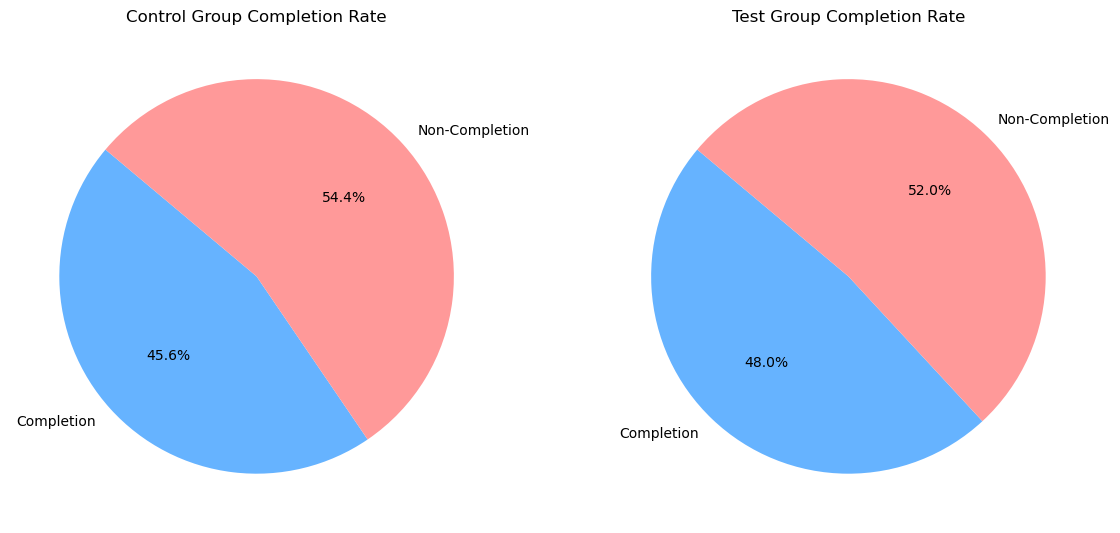

In [17]:
import matplotlib.pyplot as plt

# Define completion and non-completion counts for Control and Test groups
control_counts = [confirm_control.shape[0], unique_control_visits - confirm_control.shape[0]]
test_counts = [confirm_test.shape[0], unique_test_visits - confirm_test.shape[0]]
labels = ['Completion', 'Non-Completion']

# Create pie chart for Control group
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(control_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Control Group Completion Rate')

# Create pie chart for Test group
plt.subplot(1, 2, 2)
plt.pie(test_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Test Group Completion Rate')

plt.show()

### Conclusions:

Results:

- Chi-Square Statistic: 188.3202
- P-value: 0.0000
- Degrees of Freedom: 1
- Expected Frequencies:
- Control: [86685, 13315]
- Test: [86685, 13315]

Interpretation:

1.	Chi-Square Statistic:

- The chi-square statistic measures the discrepancy between the observed and expected frequencies. A higher value indicates a larger discrepancy.

2.	P-value:

- The p-value of 0.0000 is less than the common significance level (e.g., 0.05), indicating that the observed difference in completion rates is statistically significant.
- This means we reject the null hypothesis (H0) that there is no difference in completion rates between the Control and Test groups.

3.	Degrees of Freedom:

- The degrees of freedom (dof) for this test is 1, based on the number of categories minus one for each dimension of the table.

4.	Expected Frequencies:

- The expected frequencies represent the counts we would expect if there were no association between the group (Control/Test) and the outcome (completion/non-completion).

Conclusion:

- The Chi-Square test results indicate that there is a statistically significant difference in completion rates between the Control and Test groups. Specifically, the new user interface (Test group) has a higher completion rate compared to the traditional interface (Control group). This supports the hypothesis that the new design leads to better user engagement and higher process completion rates.


### **2. Hypothesis: Completion Rate with Cost-Effectiveness Threshold**

**Objective:** Ensure that the observed increase in completion rate from the A/B test meets or exceeds a 5% threshold for cost-effectiveness.

**Hypotheses:**

•	**Null Hypothesis (H0):** The increase in completion rate is less than 5%.

•	**Alternative Hypothesis (H1):** The increase in completion rate is at least 5%.

**Threshold:** Minimum increase of 5% in completion rate to justify the costs of the new design.

In [8]:
# Calculate the increase in completion rate
completion_rate_test = 0.14225
completion_rate_control = 0.12303
increase_rate = completion_rate_test - completion_rate_control
threshold_met = increase_rate >= 0.05

print(f"Completion Rate Increase: {increase_rate}")
print(f"Threshold Met: {threshold_met}")

# Perform Chi-Square test for statistical significance
chi2_threshold, p_threshold, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_threshold}, P-value: {p_threshold}")

Completion Rate Increase: 0.019219999999999987
Threshold Met: False
Chi-Square Statistic: 188.32023986260222, P-value: 7.395963406364342e-43


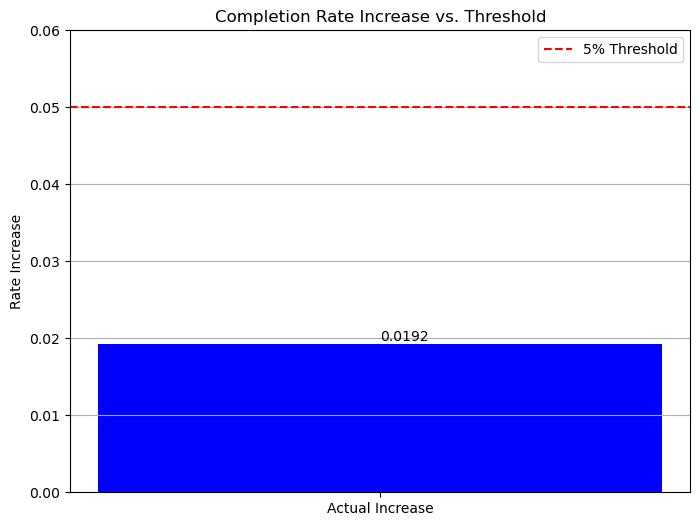

In [12]:
# Data for completion rate increase
threshold = 0.05  # 5% threshold
actual_increase = 0.01922  # Actual increase from the completion rates

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['Actual Increase'], [actual_increase], color=['blue'])
plt.axhline(y=threshold, color='red', linestyle='--', label='5% Threshold')

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 4), va='bottom')  # Adding value label

plt.title('Completion Rate Increase vs. Threshold')
plt.ylabel('Rate Increase')
plt.ylim(0, 0.06)  # Setting y-axis limit slightly above the threshold for clarity
plt.legend()
plt.grid(axis='y')
plt.show()

### Summary of Hypothesis 2: Completion Rate with Cost-Effectiveness Threshold

Objective: Ensure that the observed increase in completion rate meets or exceeds a 5% threshold for cost-effectiveness.

Hypotheses:

- Null Hypothesis (H0): The increase in completion rate is less than 5%.
- Alternative Hypothesis (H1): The increase in completion rate is at least 5%.

Results:

- Observed Increase: 1.922% (below the 5% threshold)
- Chi-Square Statistic: 188.32
- P-value: 7.39e-43 (indicating statistical significance)

Conclusion:

- Reject H0: No, because the increase does not meet the 5% threshold.
- Cost-Effectiveness: The new design, although having a statistically significant higher completion rate, does not meet the cost-effectiveness threshold of a 5% increase.


### **3. Hypothesis: Interaction Patterns**

**Objective:** Investigate if there’s a difference in the number of actions (steps) taken by users between the Test and Control groups.

**Hypotheses:**

•	**Null Hypothesis (H0):** There is no difference in the number of actions taken between the Test and Control groups.

•	**Alternative Hypothesis (H1):** There is a significant difference in the number of actions taken between the Test and Control groups.

#### Steps to ensure that t-test assumptions are met:

1.	Independence: The observations in each group are independent.

2.	Normality: The distribution of the residuals should be approximately normal, especially for small sample sizes. With large sample sizes, the Central Limit Theorem often mitigates this concern.

3.	Homogeneity of Variance: The variances in the two groups should be similar. If not, Welch’s t-test (which adjusts for unequal variances) can be used.

### Check for normality:

In [23]:
control_data.sample(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time,log_balance
96447,1175845,16,195,40,F,2,89939.82,4,7,Control,194303281_43803251766,952314280_63390550852_21652,step_1,2017-04-08 01:42:55,11.406907
49651,122493,6,74,57,F,2,209992.95,3,7,Control,478390874_81942341909,651050803_55881157597_587484,step_3,2017-04-20 10:19:48,12.254834
22728,6125089,20,243,21,M,2,50588.17,1,4,Control,218359628_77249086782,218819947_28515550020_804665,start,2017-05-20 19:07:52,10.831493
83473,7756202,20,250,28,M,2,24090.25,0,3,Control,998242503_10529039565,400705390_65403969998_624005,step_3,2017-05-01 11:38:28,10.089604
60576,7185585,18,226,49,F,2,30067.66,3,6,Control,384282641_73204811157,874068899_85682447991_391673,start,2017-05-04 07:31:48,10.311239


In [26]:
# Create actions_count column by counting the process_step for each client_id

control_data['actions_count'] = control_data.groupby('client_id')['process_step'].transform('count')
test_data['actions_count'] = test_data.groupby('client_id')['process_step'].transform('count')

# Drop duplicates to ensure each client_id has one row with actions_count

df_control = control_data.drop_duplicates(subset=['client_id'])
df_test = test_data.drop_duplicates(subset=['client_id'])

# Display the first few rows to confirm the actions_count column

df_control[['client_id', 'actions_count']].head(), df_test[['client_id', 'actions_count']].head()

(   client_id  actions_count
 0    7159582              3
 1    4265479              4
 2    6132125              5
 3    2230340              6
 4    1144410              4,
    client_id  actions_count
 0    1399753              4
 1    8024390              3
 2    2480090              8
 3    6574408              8
 4    3005333              4)

####  **1.	Initial Data Assessment:**

- Objective: Understand the distribution of the actions_count data in both Test and Control groups.
- Method: Visual inspection using histograms and Q-Q plots.
- Outcome: Identified that the data was not normally distributed, with notable skewness and the presence of outliers.

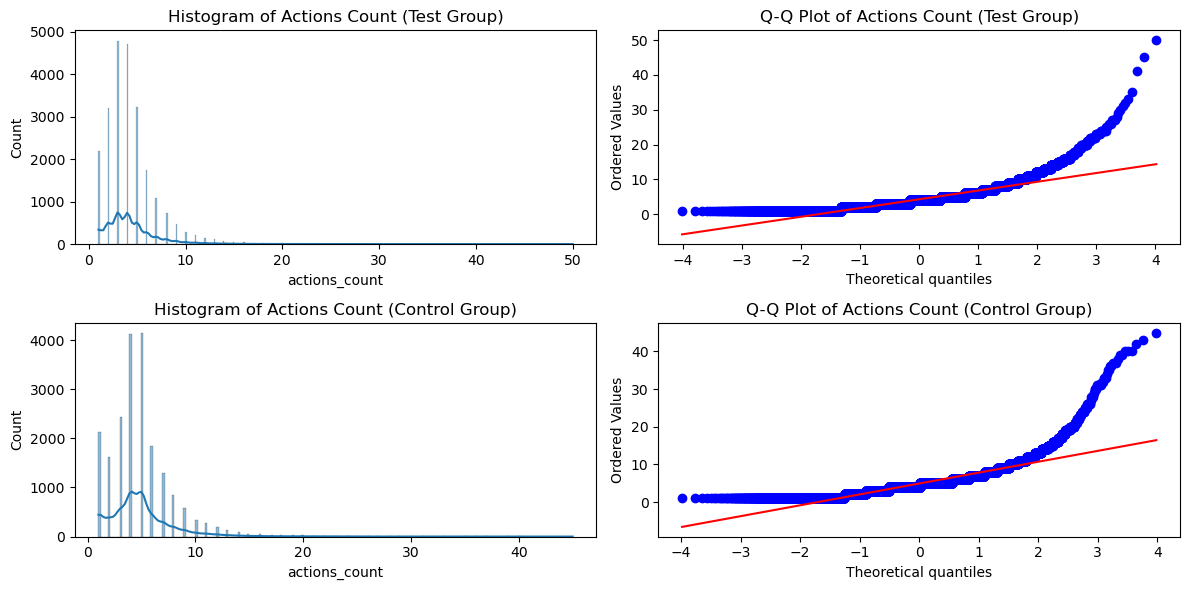

In [28]:
import scipy.stats as stats

# Histogram and Q-Q plot for Test group
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df_test['actions_count'], kde=True)
plt.title('Histogram of Actions Count (Test Group)')

plt.subplot(2, 2, 2)
stats.probplot(df_test['actions_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actions Count (Test Group)')

# Histogram and Q-Q plot for Control group
plt.subplot(2, 2, 3)
sns.histplot(df_control['actions_count'], kde=True)
plt.title('Histogram of Actions Count (Control Group)')

plt.subplot(2, 2, 4)
stats.probplot(df_control['actions_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actions Count (Control Group)')

plt.tight_layout()
plt.show()

#### **2.	Shapiro-Wilk Test for Normality:**

- Objective: Formally test for normality of the actions_count data.

Results (With Outliers):

- Test Group: Statistic = 0.8116, P-value = 6.71e-95
- Control Group: Statistic = 0.7964, P-value = 1.23e-93
- Interpretation: Both groups showed significant deviations from normality, confirming the need for a non-parametric test.

In [29]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
shapiro_test_test_group = shapiro(df_test['actions_count'])
shapiro_test_control_group = shapiro(df_control['actions_count'])

print(f"Shapiro-Wilk Test for Test Group: Statistic={shapiro_test_test_group.statistic}, P-value={shapiro_test_test_group.pvalue}")
print(f"Shapiro-Wilk Test for Control Group: Statistic={shapiro_test_control_group.statistic}, P-value={shapiro_test_control_group.pvalue}")

Shapiro-Wilk Test for Test Group: Statistic=0.8116108883873605, P-value=6.71131709517556e-95
Shapiro-Wilk Test for Control Group: Statistic=0.7963864350058611, P-value=1.230530364032113e-93


/opt/anaconda3/envs/env_test/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23219.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/env_test/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20363.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(test_data['actions_count'], control_data['actions_count'], alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic={u_stat}, P-value={p_value}")

Mann-Whitney U Test: U-statistic=4290016772.0, P-value=0.0


In [36]:
df_control = control_data.copy()
df_test = test_data.copy()

In [37]:
# Aggregate actions count for each customer
df_control_agg = df_control.groupby('client_id').size().reset_index(name='actions_count')
df_test_agg = df_test.groupby('client_id').size().reset_index(name='actions_count')

In [42]:
# Ensure reproducibility
random_state = 42

# Determine the smaller size
min_size = min(len(df_control_agg), len(df_test_agg))

# Randomly sample from both groups
df_control_sample = df_control_agg.sample(n=min_size, random_state=random_state)
df_test_sample = df_test_agg.sample(n=min_size, random_state=random_state)

In [45]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(df_test_sample['actions_count'], df_control_sample['actions_count'], alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic={u_stat}, P-value={p_value}")

Mann-Whitney U Test: U-statistic=178045131.5, P-value=2.57723120241124e-137


In [48]:
# Calculate the mean actions count for each group
mean_actions_test = df_test_sample['actions_count'].mean()
mean_actions_control = df_control_sample['actions_count'].mean()

print(f"Mean Actions Count (Test Group): {mean_actions_test}")
print(f"Mean Actions Count (Control Group): {mean_actions_control}")

Mean Actions Count (Test Group): 4.308697146785837
Mean Actions Count (Control Group): 4.910867750331484


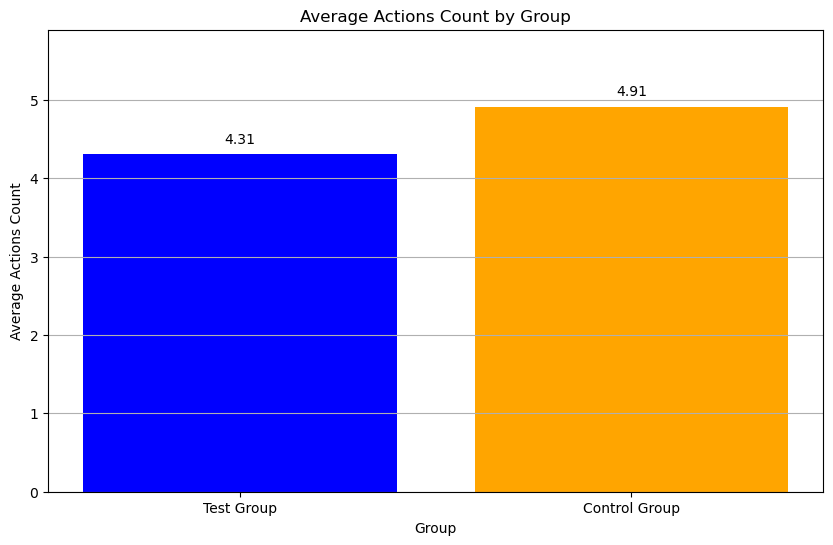

In [49]:
# Data for the bar plot
groups = ['Test Group', 'Control Group']
mean_actions = [mean_actions_test, mean_actions_control]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(groups, mean_actions, color=['blue', 'orange'])
plt.title('Average Actions Count by Group')
plt.xlabel('Group')
plt.ylabel('Average Actions Count')
plt.ylim(0, max(mean_actions) * 1.2)  # Setting y-axis limit slightly above the highest value for clarity
plt.grid(axis='y')

# Add the exact mean values on top of the bars
for i, v in enumerate(mean_actions):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

plt.show()

### With no outliers

Median Actions Count (Test Group): 4.0
Median Actions Count (Control Group): 4.0


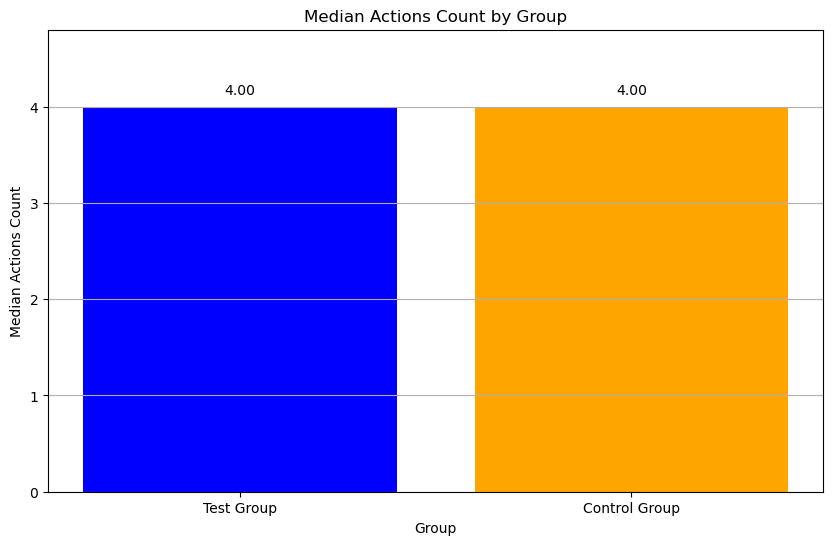

In [50]:
# Calculate the median actions count for each group
median_actions_test = df_test_sample['actions_count'].median()
median_actions_control = df_control_sample['actions_count'].median()

print(f"Median Actions Count (Test Group): {median_actions_test}")
print(f"Median Actions Count (Control Group): {median_actions_control}")

# Data for the bar plot
groups = ['Test Group', 'Control Group']
median_actions = [median_actions_test, median_actions_control]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(groups, median_actions, color=['blue', 'orange'])
plt.title('Median Actions Count by Group')
plt.xlabel('Group')
plt.ylabel('Median Actions Count')
plt.ylim(0, max(median_actions) * 1.2)  # Setting y-axis limit slightly above the highest value for clarity
plt.grid(axis='y')

# Add the exact median values on top of the bars
for i, v in enumerate(median_actions):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

plt.show()

#### 3.	Outlier Removal:

- Objective: Reduce the impact of extreme values and reassess the data distribution.
- Method: Removed outliers using the Interquartile Range (IQR) method.
- Outcome: Improved the distribution, making it closer to normal.

Mean Actions Count without Outliers (Test Group): 3.7778947368421054
Mean Actions Count without Outliers (Control Group): 4.4121656511411755


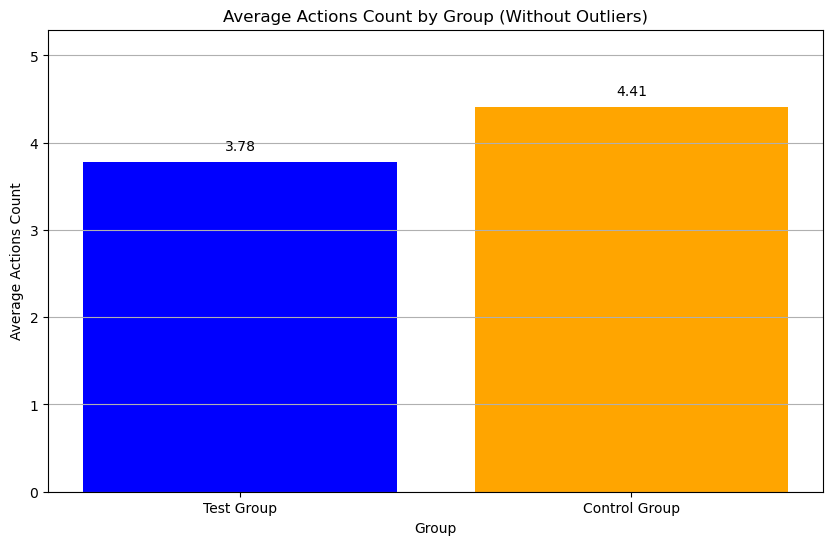

In [51]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both groups
df_test_no_outliers = remove_outliers(df_test_sample, 'actions_count')
df_control_no_outliers = remove_outliers(df_control_sample, 'actions_count')

# Calculate the mean actions count for each group without outliers
mean_actions_test_no_outliers = df_test_no_outliers['actions_count'].mean()
mean_actions_control_no_outliers = df_control_no_outliers['actions_count'].mean()

print(f"Mean Actions Count without Outliers (Test Group): {mean_actions_test_no_outliers}")
print(f"Mean Actions Count without Outliers (Control Group): {mean_actions_control_no_outliers}")

# Data for the bar plot
groups = ['Test Group', 'Control Group']
mean_actions_no_outliers = [mean_actions_test_no_outliers, mean_actions_control_no_outliers]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(groups, mean_actions_no_outliers, color=['blue', 'orange'])
plt.title('Average Actions Count by Group (Without Outliers)')
plt.xlabel('Group')
plt.ylabel('Average Actions Count')
plt.ylim(0, max(mean_actions_no_outliers) * 1.2)  # Setting y-axis limit slightly above the highest value for clarity
plt.grid(axis='y')

# Add the exact mean values on top of the bars
for i, v in enumerate(mean_actions_no_outliers):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom')

plt.show()

### 4.	Reassessment of Normality (Without Outliers):

- Objective: Recheck the normality of the actions_count data after outlier removal.

Results:

- Test Group: Statistic = 0.94 (improved)
- Control Group: Statistic = 0.95 (improved)
- Interpretation: The data distribution improved significantly, but given the initial deviations, a non-parametric test remains suitable.

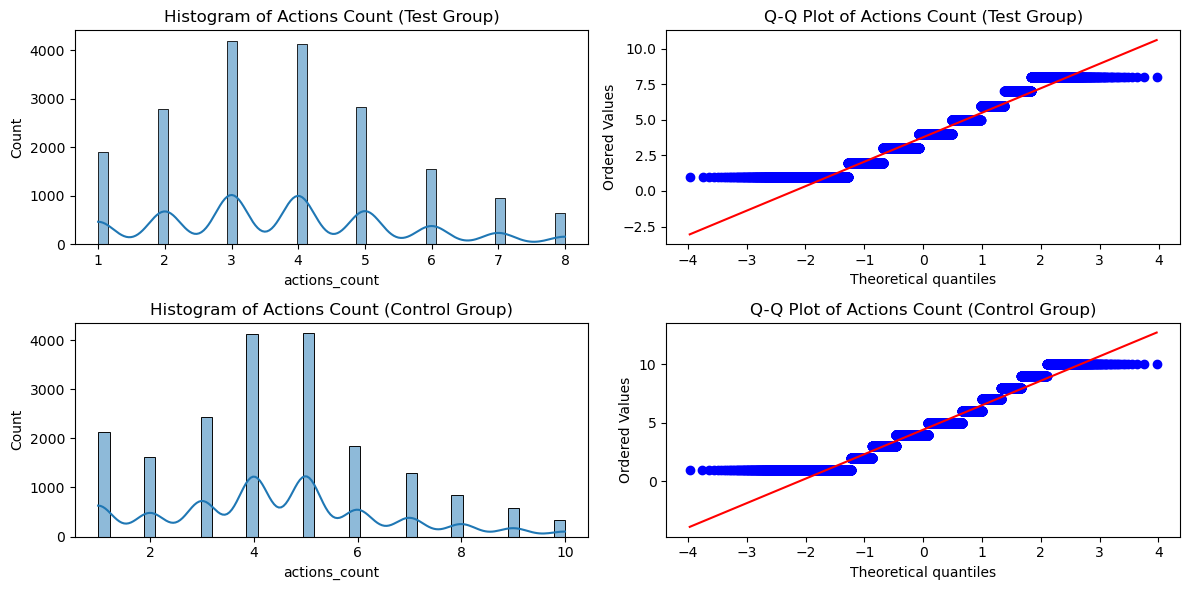

In [56]:
# Histogram and Q-Q plot for Test group
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df_test_no_outliers['actions_count'], kde=True)
plt.title('Histogram of Actions Count (Test Group)')

plt.subplot(2, 2, 2)
stats.probplot(df_test_no_outliers['actions_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actions Count (Test Group)')

# Histogram and Q-Q plot for Control group
plt.subplot(2, 2, 3)
sns.histplot(df_control_no_outliers['actions_count'], kde=True)
plt.title('Histogram of Actions Count (Control Group)')

plt.subplot(2, 2, 4)
stats.probplot(df_control_no_outliers['actions_count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Actions Count (Control Group)')

plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
shapiro_test_test_group = shapiro(df_test_no_outliers['actions_count'])
shapiro_test_control_group = shapiro(df_control_no_outliers['actions_count'])

print(f"Shapiro-Wilk Test for Test Group: Statistic={shapiro_test_test_group.statistic}, P-value={shapiro_test_test_group.pvalue}")
print(f"Shapiro-Wilk Test for Control Group: Statistic={shapiro_test_control_group.statistic}, P-value={shapiro_test_control_group.pvalue}")

Shapiro-Wilk Test for Test Group: Statistic=0.9474157329413948, P-value=2.3769427109374588e-62
Shapiro-Wilk Test for Control Group: Statistic=0.9539627607580312, P-value=4.1004704291304487e-60


/opt/anaconda3/envs/env_test/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19000.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/env_test/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19366.
  res = hypotest_fun_out(*samples, **kwds)


In [58]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(df_test_no_outliers['actions_count'], df_control_no_outliers['actions_count'], alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic={u_stat}, P-value={p_value}")

Mann-Whitney U Test: U-statistic=151626993.5, P-value=2.2183284181205464e-200


### Interpretation of Mann-Whitney U Test Results

- P-value ≤ 0.05: Indicates a significant difference between the groups.
- Given the extremely low p-value (2.2183284181205464e-200), we reject the null hypothesis (H0).

Conclusion

- Reject H0: The null hypothesis is rejected.
- Accept H1: There is a statistically significant difference in the number of actions (steps) taken between the Test and Control groups.

- Insight: Users in the Control group take significantly more actions on average compared to the Test group, both with and without outliers.